# Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
import plotly.figure_factory as ff
from scipy.stats import chi2_contingency


# Data Loading

In [2]:
df = pd.read_csv('/work/Credit_Card_Churn_Intern_BCC_2024/Dataset/BankChurners.csv')

# Preliminary Analysis

In [3]:
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [4]:
print(f'rows count : {df.shape[0]}')

rows count : 10127


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

Tipe data sudah sesuai, data numerik sudah int atau float dan categorical adalah object.

In [6]:
df = df.drop(['CLIENTNUM','Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1','Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'], axis=1)

Tiga kolom yang tidak relevan didrop

In [7]:
df.isna().sum()

Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

Tidak ada nilai null tapi apakah memang null atau hanya berubah bentuk saja?

In [8]:
for column in df.select_dtypes(include='object'):
    unique_values = df[column].unique()
    print(f"Unique values in {column}: {unique_values}")

Unique values in Attrition_Flag: ['Existing Customer' 'Attrited Customer']
Unique values in Gender: ['M' 'F']
Unique values in Education_Level: ['High School' 'Graduate' 'Uneducated' 'Unknown' 'College' 'Post-Graduate'
 'Doctorate']
Unique values in Marital_Status: ['Married' 'Single' 'Unknown' 'Divorced']
Unique values in Income_Category: ['$60K - $80K' 'Less than $40K' '$80K - $120K' '$40K - $60K' '$120K +'
 'Unknown']
Unique values in Card_Category: ['Blue' 'Gold' 'Silver' 'Platinum']


Ternyata ada unknown values pada demografi pelanggan.

In [9]:
df[df.duplicated()]

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio


Tidak ada duplikasi data. Overall dataset ini cukup bersih selain nilai unknown pada demografi pelanggan.

In [10]:
df['Attrition_Flag'] = df['Attrition_Flag'].map({'Existing Customer': 0, 'Attrited Customer': 1})

Ubah prediction target menjadi binary agar mudah melakukan EDA

# EDA

## Summary

In [11]:
fig = go.Figure()

fig.add_trace(go.Pie(
    labels=['Not Churn','Churn'],
    values=df['Attrition_Flag'].value_counts(),
    marker=dict(colors=["#8B008B", "#FF4500"]),
    textposition='inside',
    textinfo='percent+label+value',
    pull=(0,0.2),
))

fig.update_layout(title='Customer Churn Pie Chart')

fig.show()

We have only 16.1% of Customer has Churn while 83.9% didn't cancel their credit card. Therefore, it is a little difficult to train our model to predict customer turnover.

In [12]:
fig = go.Figure()

fig.add_trace(go.Pie(
    labels=['Male','Female'],
    values=df['Gender'].value_counts(),
    marker=dict(colors=["#8B008B", "#FF4500"]),
    textposition='inside',
    textinfo='percent+label+value',
    hole=0.3,
))

fig.update_layout(title='Customer Churn Pie Chart')

fig.show()

47.1% of card holder are Female while 52.9% are Male. Still quite balance.

In [13]:
fig = go.Figure()

fig.add_trace(go.Pie(
    labels=df['Education_Level'].value_counts().index,
    values=df['Education_Level'].value_counts(),
    textposition='inside',
    textinfo='percent+label+value',
))

fig.update_layout(title='Customer Education Level Pie Chart')

fig.show()

In [14]:
fig = go.Figure()

fig.add_trace(go.Pie(
    labels=df['Marital_Status'].value_counts().index,
    values=df['Marital_Status'].value_counts(),
    textposition='inside',
    textinfo='percent+label+value',
    hole=0.3,
))

fig.update_layout(title='Customer Churn Pie Chart')

fig.show()

46.7% of customer have married while 7.39% divorced.

In [15]:
fig = go.Figure()

fig.add_trace(go.Pie(
    labels=df['Income_Category'].value_counts().index,
    values=df['Income_Category'].value_counts(),
    textposition='inside',
    textinfo='percent+label+value',
))

fig.update_layout(title='Customer Education Level Pie Chart')

fig.show()

In [16]:
fig = go.Figure()

fig.add_trace(go.Pie(
    labels=df['Card_Category'].value_counts().index,
    values=df['Card_Category'].value_counts(),
    marker=dict(colors=["cornflowerblue", "c0c0c0",'gold','e5e4e2 ']),
    textposition='inside',
    textinfo='percent+label+value',
    hole=0.3
))

fig.update_layout(title='Card Category Pie Chart')

fig.show()

In [17]:
df.select_dtypes(include='number').agg(['mean', 'median', 'std', 'min', 'max']).T

,mean,median,std,min,max
Attrition_Flag,0.160660,0.000,0.367235,0.0,1.000
Customer_Age,46.325960,46.000,8.016814,26.0,73.000
Dependent_count,2.346203,2.000,1.298908,0.0,5.000
Months_on_book,35.928409,36.000,7.986416,13.0,56.000
Total_Relationship_Count,3.812580,4.000,1.554408,1.0,6.000
Months_Inactive_12_mon,2.341167,2.000,1.010622,0.0,6.000
Contacts_Count_12_mon,2.455317,2.000,1.106225,0.0,6.000
Credit_Limit,8631.953698,4549.000,9088.776650,1438.3,34516.000
Total_Revolving_Bal,1162.814061,1276.000,814.987335,0.0,2517.000
Avg_Open_To_Buy,7469.139637,3474.000,9090.685324,3.0,34516.000


## What's the correlation?

So that this analysis is not too extensive, I will find pearson the correlation coefficient, which measures linear statistical dependence between two variables. In this way, we can verify from the beginning which variables should receive the most attention, saving time in analyzing variables that do not have a strong influence on the rate of customers who leave the credit card service.

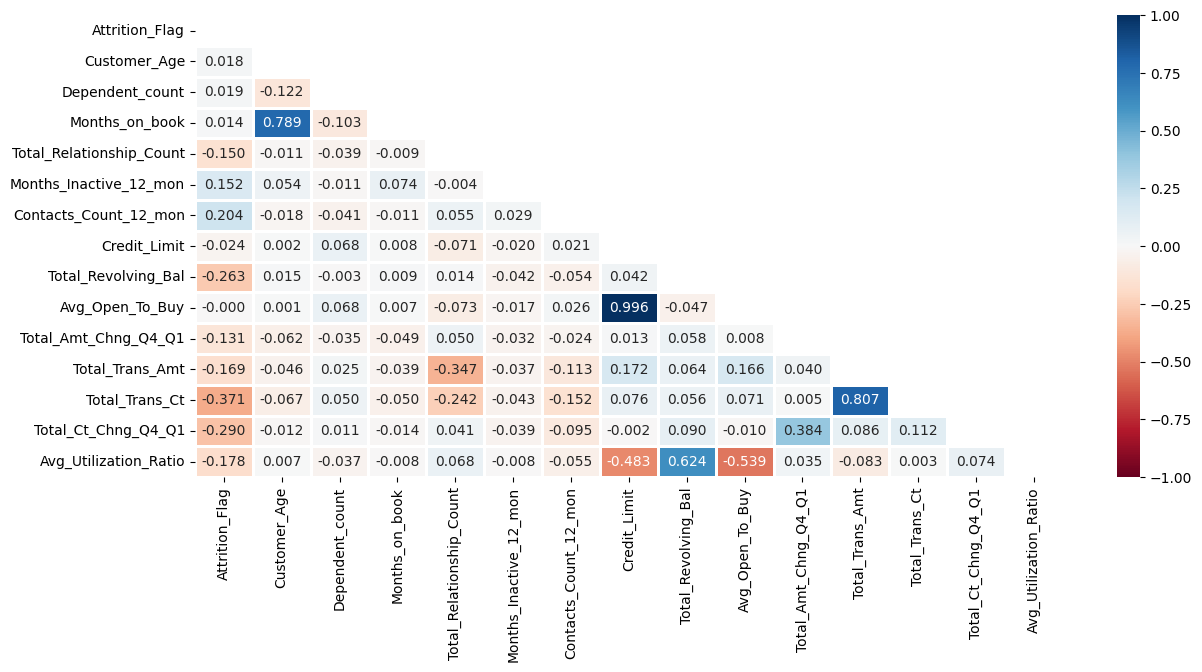

In [18]:
plt.figure(figsize=(14, 6))

corr_matrix = df.select_dtypes(include='number').corr()

# Create a triangular mask
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

sns.heatmap(corr_matrix, annot=True, cmap='RdBu', fmt='.3f', linewidths=1, mask=mask, vmin=-1, vmax=1)

# Show the plot
plt.show()

The variables that demonstrate a considerable negative correlation to the dependent attribute, and that are the target of investigation, are: Total_Trans_Ct, Total_Ct_Chng_Q4_Q1, Total_Revolving_Bal and Avg_Utilization_Ratio. A negative correlation (<0) indicates that the attribute has a relevant level of significance in the customer’s permanence.

With a positive association we have the variables: Contacts_Count_12_mon and Months_inactive_112_mon.

In [19]:
categorical_columns = df.select_dtypes(include='object').columns

# Perform chi-square tests for all pairs of categorical variables
for i in range(len(categorical_columns) - 1):
    for j in range(i + 1, len(categorical_columns)):
        column1 = categorical_columns[i]
        column2 = categorical_columns[j]

        # Create a contingency table
        contingency_table = pd.crosstab(df[column1], df[column2])

        # Perform chi-square test
        chi2, p, dof, expected = chi2_contingency(contingency_table)

        # Output results
        print(f"\nChi-square test for {column1} and {column2}:")
        print(f"Chi-square statistic: {chi2}")
        print(f"P-value: {p}")
        print(f"Degrees of freedom: {dof}")

        # Evaluate the hypothesis
        alpha = 0.05  # Significance level
        print("\nHypothesis Testing:")
        if p < alpha:
            print("Reject the null hypothesis. There is a significant association between", column1, "and", column2)
        else:
            print("Fail to reject the null hypothesis. There is no significant association between", column1, "and", column2)


Chi-square test for Gender and Education_Level:
Chi-square statistic: 7.288620128103545
P-value: 0.29497854062136986
Degrees of freedom: 6

Hypothesis Testing:
Fail to reject the null hypothesis. There is no significant association between Gender and Education_Level

Chi-square test for Gender and Marital_Status:
Chi-square statistic: 3.8753870500190284
P-value: 0.27523828441500264
Degrees of freedom: 3

Hypothesis Testing:
Fail to reject the null hypothesis. There is no significant association between Gender and Marital_Status

Chi-square test for Gender and Income_Category:
Chi-square statistic: 7138.449964928253
P-value: 0.0
Degrees of freedom: 5

Hypothesis Testing:
Reject the null hypothesis. There is a significant association between Gender and Income_Category

Chi-square test for Gender and Card_Category:
Chi-square statistic: 75.0103508939681
P-value: 3.604857850219599e-16
Degrees of freedom: 3

Hypothesis Testing:
Reject the null hypothesis. There is a significant association

## How does customer demographics affect churn rate?

30% of credit card cancellations are from people who have graduated and the lowest number of cancellations (6%) are from customers who have post Doctorate.

44% of credit card cancellations are from married people and 7% are from customers who have marital status as divorced.

38% of credit card cancellations are from people with an annual income less than 40K and 8% are from customers who have an annual income greater than or equal to 120K.

93% of credit card cancellations are from customers who have the Blue card type and the lowest number of cancellations (0.3%) are from customers who have the Platinum card type.

Education Level

In [20]:
edu_lvl_churn = df[df['Attrition_Flag'] == 1].groupby('Education_Level').size().reset_index(name='Count')

fig = go.Figure(go.Treemap(
    labels=edu_lvl_churn['Education_Level'],
    parents=[''] * len(edu_lvl_churn),  # No parents since it's a single-level Treemap
    values=edu_lvl_churn['Count'],
    text=edu_lvl_churn['Count'],
    textinfo='label+value+percent root',
    texttemplate = "%{label} <br>%{value} <br>%{percentRoot}",
    hoverinfo='label+percent entry',
    branchvalues='total',
    textposition='middle center',
    marker=dict(
        colorscale='OrRd',
        colorbar=dict(title='Count'),
    ),
    insidetextfont=dict(
        size=16,
        color=['black','black','white']
    )
))

fig.update_layout(
    title='Education Level Churn Tree Map',
)

In [21]:
edu_lvl_not_churn = df[df['Attrition_Flag'] == 0].groupby('Education_Level').size().reset_index(name='Count')

fig = go.Figure(go.Treemap(
    labels=edu_lvl_not_churn['Education_Level'],
    parents=[''] * len(edu_lvl_not_churn),  # No parents since it's a single-level Treemap
    values=edu_lvl_not_churn['Count'],
    text=edu_lvl_not_churn['Count'],
    textinfo='label+value+percent root',
    texttemplate = "%{label} <br>%{value} <br>%{percentRoot}",
    hoverinfo='label+percent entry',
    branchvalues='total',
    textposition='middle center',
    marker=dict(
        colorscale='Blues',
        colorbar=dict(title='Count'),
    ),
    insidetextfont=dict(
        size=16,
        color=['black','black','white']
    )
))

fig.update_layout(
    title='Education Level Not Churn Tree Map',
)

There is no difference in the distribution of education levels between churn and non-churn customers. 

In [22]:
mrt_sts = df[df['Attrition_Flag'] == 1].groupby('Marital_Status').size().reset_index(name='Count')

fig = go.Figure(go.Treemap(
    labels=mrt_sts['Marital_Status'],
    parents=[''] * len(mrt_sts),  # No parents since it's a single-level Treemap
    values=mrt_sts['Count'],
    text=mrt_sts['Count'],
    textinfo='label+value+percent root',
    hoverinfo='label+percent entry',
    branchvalues='total',
    textposition='middle center',
    marker=dict(
        colorscale='OrRd',
        colorbar=dict(title='Count'),
    ),
    insidetextfont=dict(
        size=16,
        color=['black','white','white']
    )
))

fig.update_layout(
    title='Marital Status Churn Tree Map',
)

In [23]:
mrt_sts = df[df['Attrition_Flag'] == 0].groupby('Marital_Status').size().reset_index(name='Count')

fig = go.Figure(go.Treemap(
    labels=mrt_sts['Marital_Status'],
    parents=[''] * len(mrt_sts),  # No parents since it's a single-level Treemap
    values=mrt_sts['Count'],
    text=mrt_sts['Count'],
    textinfo='label+value+percent root',
    hoverinfo='label+percent entry',
    branchvalues='total',
    textposition='middle center',
    marker=dict(
        colorscale='Blues',
        colorbar=dict(title='Count'),
    ),
    insidetextfont=dict(
        size=16,
        color=['black','white','white']
    )
))

fig.update_layout(
    title='Marital Status Not Churn Tree Map',
)

Income Category

In [24]:
inc_cat = df[df['Attrition_Flag'] == 1].groupby('Income_Category').size().reset_index(name='Count')

fig = go.Figure(go.Treemap(
    labels=inc_cat['Income_Category'],
    parents=[''] * len(inc_cat),  # No parents since it's a single-level Treemap
    values=inc_cat['Count'],
    text=inc_cat['Count'],
    textinfo='label+value+percent root',
    hoverinfo='label+percent entry',
    branchvalues='total',
    textposition='middle center',
    marker=dict(
        colorscale='OrRd',
        colorbar=dict(title='Count'),
    ),
    insidetextfont=dict(
        size=16,
    ),
))

fig.update_layout(
    title='Income Category Churn Tree Map',
)

In [25]:
inc_cat = df[df['Attrition_Flag'] == 0].groupby('Income_Category').size().reset_index(name='Count')

fig = go.Figure(go.Treemap(
    labels=inc_cat['Income_Category'],
    parents=[''] * len(inc_cat),  # No parents since it's a single-level Treemap
    values=inc_cat['Count'],
    text=inc_cat['Count'],
    textinfo='label+value+percent root',
    hoverinfo='label+percent entry',
    branchvalues='total',
    textposition='middle center',
    marker=dict(
        colorscale='Blues',
        colorbar=dict(title='Count'),
    ),
    insidetextfont=dict(
        size=16,
    ),
))

fig.update_layout(
    title='Income Category Not Churn Tree Map',
)

In [26]:
fig = go.Figure()

fig.add_trace(go.Bar(
    x=df[(df['Income_Category'] == 'Less than $40K') & (df['Attrition_Flag'] == 0)]['Education_Level'].value_counts().index,
    y=df[(df['Income_Category'] == 'Less than $40K') & (df['Attrition_Flag'] == 0)]['Education_Level'].value_counts(),
    marker_color='#8B008B',  # Specify the color of the bars
))


fig.add_trace(go.Bar(
    x=df[(df['Income_Category'] == 'Less than $40K') & (df['Attrition_Flag'] == 1)]['Education_Level'].value_counts().index,
    y=df[(df['Income_Category'] == 'Less than $40K') & (df['Attrition_Flag'] == 1)]['Education_Level'].value_counts(),
    marker_color='#FF4500',  # Specify the color of the bars
))

# Update layout
fig.update_layout(
    title='Bar Plot of Income Category < 40K for Edu_level ',
    xaxis_title='Income Category',
    yaxis_title='Count',
    barmode='group'
)

# Show the plot
fig.show()

In [27]:
fig = go.Figure()

fig.add_trace(go.Bar(
    x=df[(df['Income_Category'] == '$120K +') & (df['Attrition_Flag'] == 0)]['Education_Level'].value_counts().index,
    y=df[(df['Income_Category'] == '$120K +') & (df['Attrition_Flag'] == 0)]['Education_Level'].value_counts(),
    marker_color='#8B008B',  # Specify the color of the bars
))

fig.add_trace(go.Bar(
    x=df[(df['Income_Category'] == '$120K +') & (df['Attrition_Flag'] == 1)]['Education_Level'].value_counts().index,
    y=df[(df['Income_Category'] == '$120K +') & (df['Attrition_Flag'] == 1)]['Education_Level'].value_counts(),
    marker_color='#FF4500',  # Specify the color of the bars
))

# Update layout
fig.update_layout(
    title='Bar Plot of Income Category > 120K for Edu_level ',
    xaxis_title='Income Category',
    yaxis_title='Count',
    barmode='group'
)

# Show the plot
fig.show()

Card Category

In [28]:
card_cat = df[df['Attrition_Flag'] == 1].groupby('Card_Category').size().reset_index(name='Count')

fig = go.Figure(go.Treemap(
    labels=card_cat['Card_Category'],
    parents=[''] * len(card_cat),  # No parents since it's a single-level Treemap
    values=card_cat['Count'],
    text=card_cat['Count'],
    textinfo='label+value+percent root',
    hoverinfo='label+percent entry',
    branchvalues='total',
    textposition='middle center',
    marker=dict(
        colorscale='OrRd',
        colorbar=dict(title='Count'),
    ),
    insidetextfont=dict(
        size=16,
    ),
))

fig.update_layout(
    title='Card Category Churn Tree Map',
)

In [29]:
card_cat = df[df['Attrition_Flag'] == 0].groupby('Card_Category').size().reset_index(name='Count')

fig = go.Figure(go.Treemap(
    labels=card_cat['Card_Category'],
    parents=[''] * len(card_cat),  # No parents since it's a single-level Treemap
    values=card_cat['Count'],
    text=card_cat['Count'],
    textinfo='label+value+percent root',
    hoverinfo='label+percent entry',
    branchvalues='total',
    textposition='middle center',
    marker=dict(
        colorscale='Blues',
        colorbar=dict(title='Count'),
    ),
    insidetextfont=dict(
        size=16,
    ),
))

fig.update_layout(
    title='Card Category Not Churn Tree Map',
)

## What is the distribution of variables associated with churn, and who do they consist of?

Among credit card cancellations, 50% of cases involve individuals with a total transaction count less than 43, and 75% of them have a count less than 51. In contrast, for those who did not cancel their credit cards, 50% have a total transaction count less than 71, with 75% having a count less than 82.

Among credit card cancellations, 50% of cases involve individuals with a total transaction count change less than 0.53, and 75% of them have a count less than 0.69. In contrast, for those who did not cancel their credit cards, 50% have a transaction count change less than 0.72, with 75% having a count less than 0.83.

Among credit card cancellations, 50% of cases involve individuals with a total revolving balance of 0, and 75% of them have a revolving balance less than $1505. In contrast, for those who did not cancel their credit cards, 50% have a total revolving balance less than $1364, with 75% having a total revolving balance less than $1807.

Among credit card cancellations, 50% of cases involve individuals with an average utilization ratio of 0, and 75% of them have an average utilization ratio less than 0.23. In contrast, for those who did not cancel their credit cards, 50% have an average utilization ratio less than 0.21, with 75% having a count less than 0.52.

### 

### Total Transaction Count in a year

In [30]:
fig = px.area(
    df.groupby(['Total_Trans_Ct', 'Attrition_Flag']).size().reset_index(name='count'),
    x='Total_Trans_Ct',
    y='count',
    color='Attrition_Flag',
    labels={'Total_Trans_Ct': 'Total Transactions', 'count': 'Frequency'},
    title='Stacked Area Chart Total transactions (last 12 months)',
    template='plotly_white',
    color_discrete_sequence=["#FF4500","#8B008B", "#FC4E07"]
)

fig.update_layout(
    xaxis_title='Total Transactions',
    yaxis_title='Frequency',
    legend=dict(orientation='h', x=0.5, y=-0.15),
    hovermode='x unified'
)

fig.show()

In [31]:
fig = px.box(
    df,
    x='Attrition_Flag',
    y='Total_Trans_Ct',
    color='Attrition_Flag',
    boxmode='overlay',  # 'overlay' to show multiple boxes on the same plot
    labels={'Total_Trans_Ct': 'Number of transactions in the last 12 months'},
    title='',
    template='plotly_white',
)

fig.update_layout(
    yaxis_title='Number of transactions in the last 12 months',
)

fig.show()

In [32]:
ttl_amnt_not_churn_20 = df[(df['Total_Trans_Ct'] <= 20) & (df['Attrition_Flag'] == 0)]['Total_Trans_Amt']
ttl_amnt_churn_20 = df[(df['Total_Trans_Ct'] <= 20) & (df['Attrition_Flag'] == 1)]['Total_Trans_Amt']

In [33]:
fig = go.Figure()

fig.add_trace(go.Histogram(
    x=df[(df['Total_Trans_Ct'] <= 20) & (df['Attrition_Flag'] == 0)]['Total_Trans_Amt'],
    name='Not Churned',
    marker_color='#1f77b4',  # Specify the color of the bars
    nbinsx=14,
    opacity=0.7
))

fig.add_trace(go.Histogram(
    x=df[(df['Total_Trans_Ct'] <= 20) & (df['Attrition_Flag'] == 1)]['Total_Trans_Amt'],
    name='Churned',
    marker_color='#FF7F0E',  # Specify the color of the bars
    nbinsx=14,
    opacity=0.7
))

# Update layout
fig.update_layout(
    title='Histogram of Total Transaction Amount for Total_Trans_Ct <= 20',
    xaxis_title='Total Transaction Amount',
    yaxis_title='Frequency',
    barmode='overlay'  # Overlay histograms for better comparison
)


# Show the plot
fig.show()


In [34]:
fig = go.Figure()

fig.add_trace(go.Histogram(
    x=df[(df['Total_Trans_Ct'] <= 20) & (df['Attrition_Flag'] == 0)]['Total_Relationship_Count'],
    name='Not Churned',
    marker_color='#1f77b4',  # Specify the color of the bars
    nbinsx=14,
    opacity=0.7
))

fig.add_trace(go.Histogram(
    x=df[(df['Total_Trans_Ct'] <= 20) & (df['Attrition_Flag'] == 1)]['Total_Relationship_Count'],
    name='Churned',
    marker_color='#FF7F0E',  # Specify the color of the bars
    nbinsx=14,
    opacity=0.7
))

# Update layout
fig.update_layout(
    title='Histogram of Total Relationship Count for Total_Trans_Ct <= 20',
    xaxis_title='Total Relationship Count',
    yaxis_title='Frequency',
    barmode='overlay'  # Overlay histograms for better comparison
)


# Show the plot
fig.show()


In [35]:
fig = go.Figure()

fig.add_trace(go.Histogram(
    x=df[(df['Total_Trans_Ct'] <= 20) & (df['Attrition_Flag'] == 0)]['Income_Category'],
    name='Not Churned',
    marker_color='#1f77b4',  # Specify the color of the bars
    nbinsx=14,
    opacity=0.7
))

fig.add_trace(go.Histogram(
    x=df[(df['Total_Trans_Ct'] <= 20) & (df['Attrition_Flag'] == 1)]['Income_Category'],
    name='Churned',
    marker_color='#FF7F0E',  # Specify the color of the bars
    nbinsx=14,
    opacity=0.7
))

# Update layout
fig.update_layout(
    title='Histogram of Income Category for Total_Trans_Ct <= 20',
    xaxis_title='Income Category',
    yaxis_title='Frequency',
)


# Show the plot
fig.show()

In [36]:
fig = go.Figure()

fig.add_trace(go.Histogram(
    x=df[(df['Total_Trans_Ct'] <= 20) & (df['Attrition_Flag'] == 0)]['Education_Level'],
    name='Not Churned',
    marker_color='#1f77b4',  # Specify the color of the bars
    nbinsx=14,
    opacity=0.7
))

fig.add_trace(go.Histogram(
    x=df[(df['Total_Trans_Ct'] <= 20) & (df['Attrition_Flag'] == 1)]['Education_Level'],
    name='Churned',
    marker_color='#FF7F0E',  # Specify the color of the bars
    nbinsx=14,
    opacity=0.7
))

# Update layout
fig.update_layout(
    title='Histogram of Education Level for Total_Trans_Ct <= 20',
    xaxis_title='Education Level',
    yaxis_title='Frequency',
)


# Show the plot
fig.show()

In [37]:
fig = go.Figure()

fig.add_trace(go.Histogram(
    x=df[(df['Total_Trans_Ct'] <= 20) & (df['Attrition_Flag'] == 0)]['Marital_Status'],
    name='Not Churned',
    marker_color='#1f77b4',  # Specify the color of the bars
    nbinsx=14,
    opacity=0.7
))

fig.add_trace(go.Histogram(
    x=df[(df['Total_Trans_Ct'] <= 20) & (df['Attrition_Flag'] == 1)]['Marital_Status'],
    name='Churned',
    marker_color='#FF7F0E',  # Specify the color of the bars
    nbinsx=14,
    opacity=0.7
))

# Update layout
fig.update_layout(
    title='Histogram of Marital Status for Total_Trans_Ct <= 20',
    xaxis_title='Marital Status',
    yaxis_title='Frequency',
)


# Show the plot
fig.show()

In [38]:
fig = go.Figure()

fig.add_trace(go.Histogram(
    x=df[(df['Total_Trans_Ct'] <= 20) & (df['Attrition_Flag'] == 0)]['Card_Category'],
    name='Not Churned',
    marker_color='#1f77b4',  # Specify the color of the bars
    nbinsx=14,
    opacity=0.7
))

fig.add_trace(go.Histogram(
    x=df[(df['Total_Trans_Ct'] <= 20) & (df['Attrition_Flag'] == 1)]['Card_Category'],
    name='Churned',
    marker_color='#FF7F0E',  # Specify the color of the bars
    nbinsx=14,
    opacity=0.7
))

# Update layout
fig.update_layout(
    title='Histogram of Card Category for Total_Trans_Ct <= 20',
    xaxis_title='Card Category',
    yaxis_title='Frequency',
)


# Show the plot
fig.show()

In [39]:
fig = go.Figure()

fig.add_trace(go.Histogram(
    x=df[(df['Total_Trans_Ct'] <= 20) & (df['Attrition_Flag'] == 0)]['Contacts_Count_12_mon'],
    name='Not Churned',
    marker_color='#1f77b4',  # Specify the color of the bars
    nbinsx=14,
    opacity=0.7
))

fig.add_trace(go.Histogram(
    x=df[(df['Total_Trans_Ct'] <= 20) & (df['Attrition_Flag'] == 1)]['Contacts_Count_12_mon'],
    name='Churned',
    marker_color='#FF7F0E',  # Specify the color of the bars
    nbinsx=14,
    opacity=0.7
))

# Update layout
fig.update_layout(
    title='Histogram of Annual Contacts Count for Total_Trans_Ct <= 20',
    xaxis_title='Annual Contacts Count',
    yaxis_title='Frequency',
    barmode='overlay'  # Overlay histograms for better comparison
)


# Show the plot
fig.show()


In [40]:
fig = go.Figure()

fig.add_trace(go.Histogram(
    x=df[(df['Total_Trans_Ct'] <= 60) & (df['Total_Trans_Ct'] >= 30) &(df['Attrition_Flag'] == 0)]['Total_Trans_Amt'],
    name='Not Churned',
    marker_color='#1f77b4',  # Specify the color of the bars
    nbinsx=14,
    opacity=0.7
))

fig.add_trace(go.Histogram(
    x=df[(df['Total_Trans_Ct'] <= 60) & (df['Total_Trans_Ct'] >= 30) & (df['Attrition_Flag'] == 1)]['Total_Trans_Amt'],
    name='Churned',
    marker_color='#FF7F0E',  # Specify the color of the bars
    nbinsx=14,
    opacity=0.7
))

# Update layout
fig.update_layout(
    title='Histogram of Total Transaction Amount for 30 <= Total_Trans_Ct <= 60',
    xaxis_title='Total Transaction Amount',
    yaxis_title='Frequency',
    barmode='overlay'  # Overlay histograms for better comparison
)

# Show the plot
fig.show()


In [41]:
fig = go.Figure()

fig.add_trace(go.Histogram(
    x=df[(df['Total_Trans_Ct'] <= 60) & (df['Total_Trans_Ct'] >= 30) &(df['Attrition_Flag'] == 0)]['Total_Relationship_Count'],
    name='Not Churned',
    marker_color='#1f77b4',  # Specify the color of the bars
    nbinsx=14,
    opacity=0.7
))

fig.add_trace(go.Histogram(
    x=df[(df['Total_Trans_Ct'] <= 60) & (df['Total_Trans_Ct'] >= 30) & (df['Attrition_Flag'] == 1)]['Total_Relationship_Count'],
    name='Churned',
    marker_color='#FF7F0E',  # Specify the color of the bars
    nbinsx=14,
    opacity=0.7
))

# Update layout
fig.update_layout(
    title='Histogram of Total Relationship Count for 30 <= Total_Trans_Ct <= 60',
    xaxis_title='Total Relationship Count',
    yaxis_title='Frequency',
    barmode='overlay'  # Overlay histograms for better comparison
)


# Show the plot
fig.show()


In [42]:
fig = go.Figure()

fig.add_trace(go.Histogram(
    x=df[(df['Total_Trans_Ct'] <= 60) & (df['Total_Trans_Ct'] >= 30) &(df['Attrition_Flag'] == 0)]['Income_Category'],
    name='Not Churned',
    marker_color='#1f77b4',  # Specify the color of the bars
    nbinsx=14,
    opacity=0.7
))

fig.add_trace(go.Histogram(
    x=df[(df['Total_Trans_Ct'] <= 60) & (df['Total_Trans_Ct'] >= 30) & (df['Attrition_Flag'] == 1)]['Income_Category'],
    name='Churned',
    marker_color='#FF7F0E',  # Specify the color of the bars
    nbinsx=14,
    opacity=0.7
))

# Update layout
fig.update_layout(
    title='Histogram of Income Category for 30 <= Total_Trans_Ct <= 60',
    xaxis_title='Income Category',
    yaxis_title='Frequency',
)


# Show the plot
fig.show()


In [43]:
fig = go.Figure()

fig.add_trace(go.Histogram(
    x=df[(df['Total_Trans_Ct'] <= 60) & (df['Total_Trans_Ct'] >= 30) &(df['Attrition_Flag'] == 0)]['Education_Level'],
    name='Not Churned',
    marker_color='#1f77b4',  # Specify the color of the bars
    nbinsx=14,
    opacity=0.7
))

fig.add_trace(go.Histogram(
    x=df[(df['Total_Trans_Ct'] <= 60) & (df['Total_Trans_Ct'] >= 30) & (df['Attrition_Flag'] == 1)]['Education_Level'],
    name='Churned',
    marker_color='#FF7F0E',  # Specify the color of the bars
    nbinsx=14,
    opacity=0.7
))

# Update layout
fig.update_layout(
    title='Histogram of Education Level for 30 <= Total_Trans_Ct <= 60',
    xaxis_title='Education Level',
    yaxis_title='Frequency',
)


# Show the plot
fig.show()


In [44]:
fig = go.Figure()

fig.add_trace(go.Histogram(
    x=df[(df['Total_Trans_Ct'] <= 60) & (df['Total_Trans_Ct'] >= 30) &(df['Attrition_Flag'] == 0)]['Marital_Status'],
    name='Not Churned',
    marker_color='#1f77b4',  # Specify the color of the bars
    nbinsx=14,
    opacity=0.7
))

fig.add_trace(go.Histogram(
    x=df[(df['Total_Trans_Ct'] <= 60) & (df['Total_Trans_Ct'] >= 30) & (df['Attrition_Flag'] == 1)]['Marital_Status'],
    name='Churned',
    marker_color='#FF7F0E',  # Specify the color of the bars
    nbinsx=14,
    opacity=0.7
))

# Update layout
fig.update_layout(
    title='Histogram of Marital Status for 30 <= Total_Trans_Ct <= 60',
    xaxis_title='Marital Status',
    yaxis_title='Frequency',
)


# Show the plot
fig.show()

In [45]:
fig = go.Figure()

fig.add_trace(go.Histogram(
    x=df[(df['Total_Trans_Ct'] <= 60) & (df['Total_Trans_Ct'] >= 30) &(df['Attrition_Flag'] == 0)]['Card_Category'],
    name='Not Churned',
    marker_color='#1f77b4',  # Specify the color of the bars
    nbinsx=14,
    opacity=0.7
))

fig.add_trace(go.Histogram(
    x=df[(df['Total_Trans_Ct'] <= 60) & (df['Total_Trans_Ct'] >= 30) & (df['Attrition_Flag'] == 1)]['Card_Category'],
    name='Churned',
    marker_color='#FF7F0E',  # Specify the color of the bars
    nbinsx=14,
    opacity=0.7
))

# Update layout
fig.update_layout(
    title='Histogram of Card Category for 30 <= Total_Trans_Ct <= 60',
    xaxis_title='Card Category',
    yaxis_title='Frequency',
)


# Show the plot
fig.show()

In [46]:
fig = go.Figure()

fig.add_trace(go.Histogram(
    x=df[(df['Total_Trans_Ct'] <= 60) & (df['Total_Trans_Ct'] >= 30) &(df['Attrition_Flag'] == 0)]['Contacts_Count_12_mon'],
    name='Not Churned',
    marker_color='#1f77b4',  # Specify the color of the bars
    nbinsx=14,
    opacity=0.7
))

fig.add_trace(go.Histogram(
    x=df[(df['Total_Trans_Ct'] <= 60) & (df['Total_Trans_Ct'] >= 30) & (df['Attrition_Flag'] == 1)]['Contacts_Count_12_mon'],
    name='Churned',
    marker_color='#FF7F0E',  # Specify the color of the bars
    nbinsx=14,
    opacity=0.7
))

# Update layout
fig.update_layout(
    title='Histogram of Annual Contact Count for 30 <= Total_Trans_Ct <= 60',
    xaxis_title='Annual Contact Count',
    yaxis_title='Frequency',
    barmode='overlay'  # Overlay histograms for better comparison
)


# Show the plot
fig.show()


In [47]:
fig = go.Figure()

fig.add_trace(go.Histogram(
    x=df[(df['Total_Trans_Ct'] <= 90) & (df['Total_Trans_Ct'] >= 60) &(df['Attrition_Flag'] == 0)]['Total_Trans_Amt'],
    name='Not Churned',
    marker_color='#1f77b4',  # Specify the color of the bars
    nbinsx=14,
    opacity=0.7
))

fig.add_trace(go.Histogram(
    x=df[(df['Total_Trans_Ct'] <= 90) & (df['Total_Trans_Ct'] >= 60) & (df['Attrition_Flag'] == 1)]['Total_Trans_Amt'],
    name='Churned',
    marker_color='#FF7F0E',  # Specify the color of the bars
    nbinsx=14,
    opacity=0.7
))

# Update layout
fig.update_layout(
    title='Histogram of Total Transaction Amount for 60 <= Total_Trans_Ct <= 90',
    xaxis_title='Total Transaction Amount',
    yaxis_title='Frequency',
    barmode='overlay'  # Overlay histograms for better comparison
)


# Show the plot
fig.show()


In [48]:
fig = go.Figure()

fig.add_trace(go.Histogram(
    x=df[(df['Total_Trans_Ct'] <= 90) & (df['Total_Trans_Ct'] >= 60) &(df['Attrition_Flag'] == 0)]['Income_Category'],
    name='Not Churned',
    marker_color='#1f77b4',  # Specify the color of the bars
    nbinsx=14,
    opacity=0.7
))

fig.add_trace(go.Histogram(
    x=df[(df['Total_Trans_Ct'] <= 90) & (df['Total_Trans_Ct'] >= 60) & (df['Attrition_Flag'] == 1)]['Income_Category'],
    name='Churned',
    marker_color='#FF7F0E',  # Specify the color of the bars
    nbinsx=14,
    opacity=0.7
))

# Update layout
fig.update_layout(
    title='Histogram of Income Category for 60 <= Total_Trans_Ct <= 90',
    xaxis_title='Income Category',
    yaxis_title='Frequency',
)


# Show the plot
fig.show()


In [49]:
fig = go.Figure()

fig.add_trace(go.Histogram(
    x=df[(df['Total_Trans_Ct'] <= 90) & (df['Total_Trans_Ct'] >= 60) &(df['Attrition_Flag'] == 0)]['Education_Level'],
    name='Not Churned',
    marker_color='#1f77b4',  # Specify the color of the bars
    nbinsx=14,
    opacity=0.7
))

fig.add_trace(go.Histogram(
    x=df[(df['Total_Trans_Ct'] <= 90) & (df['Total_Trans_Ct'] >= 60) & (df['Attrition_Flag'] == 1)]['Education_Level'],
    name='Churned',
    marker_color='#FF7F0E',  # Specify the color of the bars
    nbinsx=14,
    opacity=0.7
))

# Update layout
fig.update_layout(
    title='Histogram of Education Level for 60 <= Total_Trans_Ct <= 90',
    xaxis_title='Education Level',
    yaxis_title='Frequency',
)


# Show the plot
fig.show()


In [50]:
fig = go.Figure()

fig.add_trace(go.Histogram(
    x=df[(df['Total_Trans_Ct'] <= 90) & (df['Total_Trans_Ct'] >= 60) &(df['Attrition_Flag'] == 0)]['Marital_Status'],
    name='Not Churned',
    marker_color='#1f77b4',  # Specify the color of the bars
    nbinsx=14,
    opacity=0.7
))

fig.add_trace(go.Histogram(
    x=df[(df['Total_Trans_Ct'] <= 90) & (df['Total_Trans_Ct'] >= 60) & (df['Attrition_Flag'] == 1)]['Marital_Status'],
    name='Churned',
    marker_color='#FF7F0E',  # Specify the color of the bars
    nbinsx=14,
    opacity=0.7
))

# Update layout
fig.update_layout(
    title='Histogram of Marital Status for 60 <= Total_Trans_Ct <= 90',
    xaxis_title='Marital Status',
    yaxis_title='Frequency',
    )

# Show the plot
fig.show()


In [51]:
fig = go.Figure()

fig.add_trace(go.Histogram(
    x=df[(df['Total_Trans_Ct'] <= 90) & (df['Total_Trans_Ct'] >= 60) &(df['Attrition_Flag'] == 0)]['Card_Category'],
    name='Not Churned',
    marker_color='#1f77b4',  # Specify the color of the bars
    nbinsx=14,
    opacity=0.7
))

fig.add_trace(go.Histogram(
    x=df[(df['Total_Trans_Ct'] <= 90) & (df['Total_Trans_Ct'] >= 60) & (df['Attrition_Flag'] == 1)]['Card_Category'],
    name='Churned',
    marker_color='#FF7F0E',  # Specify the color of the bars
    nbinsx=14,
    opacity=0.7
))

# Update layout
fig.update_layout(
    title='Histogram of Card Category for 60 <= Total_Trans_Ct <= 90',
    xaxis_title='Card Category',
    yaxis_title='Frequency',
)


# Show the plot
fig.show()


In [52]:
fig = go.Figure()

fig.add_trace(go.Histogram(
    x=df[(df['Total_Trans_Ct'] <= 90) & (df['Total_Trans_Ct'] >= 60) &(df['Attrition_Flag'] == 0)]['Total_Relationship_Count'],
    name='Not Churned',
    marker_color='#1f77b4',  # Specify the color of the bars
    nbinsx=14,
    opacity=0.7
))

fig.add_trace(go.Histogram(
    x=df[(df['Total_Trans_Ct'] <= 90) & (df['Total_Trans_Ct'] >= 60) & (df['Attrition_Flag'] == 1)]['Total_Relationship_Count'],
    name='Churned',
    marker_color='#FF7F0E',  # Specify the color of the bars
    nbinsx=14,
    opacity=0.7
))

# Update layout
fig.update_layout(
    title='Histogram of Total Relationship Count for 60 <= Total_Trans_Ct <= 90',
    xaxis_title='Total Relationship Count',
    yaxis_title='Frequency',
    barmode='overlay'  # Overlay histograms for better comparison
)


# Show the plot
fig.show()


In [53]:
fig = go.Figure()

fig.add_trace(go.Histogram(
    x=df[(df['Total_Trans_Ct'] <= 90) & (df['Total_Trans_Ct'] >= 60) &(df['Attrition_Flag'] == 0)]['Contacts_Count_12_mon'],
    name='Not Churned',
    marker_color='#1f77b4',  # Specify the color of the bars
    nbinsx=14,
    opacity=0.7
))

fig.add_trace(go.Histogram(
    x=df[(df['Total_Trans_Ct'] <= 90) & (df['Total_Trans_Ct'] >= 60) & (df['Attrition_Flag'] == 1)]['Contacts_Count_12_mon'],
    name='Churned',
    marker_color='#FF7F0E',  # Specify the color of the bars
    nbinsx=14,
    opacity=0.7
))

# Update layout
fig.update_layout(
    title='Histogram of Annual Contacts Count for 60 <= Total_Trans_Ct <= 90',
    xaxis_title='Annual Contacts Count',
    yaxis_title='Frequency',
    barmode='overlay'  # Overlay histograms for better comparison
)


# Show the plot
fig.show()


### Annual Total Transaction Count Change

In [123]:
fig = go.Figure()

# Scatter plot for Attrition_Flag = 0 (Not Churned)
fig.add_trace(go.Scatter(
    x=df[df['Attrition_Flag'] == 0]['Total_Trans_Ct'],
    y=df[df['Attrition_Flag'] == 0]['Total_Trans_Amt'],
    mode='markers',
    name='Not Churned',
    marker=dict(color='#00AFBB')
))

# Scatter plot for Attrition_Flag = 1 (Churned)
fig.add_trace(go.Scatter(
    x=df[df['Attrition_Flag'] == 1]['Total_Trans_Ct'],
    y=df[df['Attrition_Flag'] == 1]['Total_Trans_Amt'],
    mode='markers',
    name='Churned',
    marker=dict(color='#E7B800')
))

# Update layout
fig.update_layout(
    title='Total_Trans_Ct vs Total_Trans_Amt',
    xaxis_title='Total Transaction Count (last 12 months)',
    yaxis_title='Total Transaction Amount (last 12 months)',
    legend=dict(orientation="h", x=0.5, y=-0.1),
)

# Show the plot
fig.show()


In [98]:
high = df[(df['Total_Trans_Amt'] >= 11000)]
medium = df[(df['Total_Trans_Amt'] < 11000) & (df['Total_Trans_Amt'] >= 6200)]
low = df[(df['Total_Trans_Amt'] < 6200)]
print(f'High total transaction and amount changes customer count: {len(high)}')
print(f'Medium total transaction and amount changes customer count: {len(medium)}')
print(f'Low total transaction and amount changes customer count: {len(low)}')

High total transaction and amount changes customer count: 747
Medium total transaction and amount changes customer count: 700
Low total transaction and amount changes customer count: 8680


In [99]:
fig = go.Figure()

fig.add_trace(go.Histogram(
    x=df[(df['Total_Trans_Amt'] >= 11000) &(df['Attrition_Flag'] == 0)]['Income_Category'],
    name='Not Churned',
    marker_color='#1f77b4',  # Specify the color of the bars
    nbinsx=14,
    opacity=0.7
))

# Update layout
fig.update_layout(
    title='Histogram of income category with high total transaction and amount changes customer',
    xaxis_title='Total Income Category',
    yaxis_title='Frequency',
    barmode='overlay'  # Overlay histograms for better comparison
)

# Show the plot
fig.show()

In [68]:
fig = go.Figure()

fig.add_trace(go.Histogram(
    x=df[(df['Total_Trans_Amt'] >= 11000) &(df['Attrition_Flag'] == 0)]['Education_Level'],
    name='Not Churned',
    marker_color='#1f77b4',  # Specify the color of the bars
    nbinsx=14,
    opacity=0.7
))

# Update layout
fig.update_layout(
    title='Histogram of education level with high total transaction and amount changes customer',
    xaxis_title='Total Transaction Amount',
    yaxis_title='Frequency',
    barmode='overlay'  # Overlay histograms for better comparison
)

# Show the plot
fig.show()

In [69]:
fig = go.Figure()

fig.add_trace(go.Histogram(
    x=df[(df['Total_Trans_Amt'] >= 11000) &(df['Attrition_Flag'] == 0)]['Marital_Status'],
    name='Not Churned',
    marker_color='#1f77b4',  # Specify the color of the bars
    nbinsx=14,
    opacity=0.7
))

# Update layout
fig.update_layout(
    title='Histogram of Marital status with high total transaction and amount changes customer',
    xaxis_title='Marital Status',
    yaxis_title='Frequency',
    barmode='overlay'  # Overlay histograms for better comparison
)

# Show the plot
fig.show()

In [70]:
fig = go.Figure()

fig.add_trace(go.Histogram(
    x=df[(df['Total_Trans_Amt'] >= 11000) &(df['Attrition_Flag'] == 0)]['Card_Category'],
    name='Not Churned',
    marker_color='#1f77b4',  # Specify the color of the bars
    nbinsx=14,
    opacity=0.7
))

# Update layout
fig.update_layout(
    title='Histogram of Card Category with high total transaction and amount changes customer',
    xaxis_title='Card Category',
    yaxis_title='Frequency',
    barmode='overlay'  # Overlay histograms for better comparison
)

# Show the plot
fig.show()

In [100]:
fig = go.Figure()

fig.add_trace(go.Histogram(
    x=df[(df['Total_Trans_Amt'] < 11000) & (df['Total_Trans_Amt'] >= 6200) & (df['Attrition_Flag'] == 0)]['Income_Category'],
    name='Not Churned',
    marker_color='#1f77b4',  # Specify the color of the bars
    nbinsx=14,
    opacity=0.7
))

fig.add_trace(go.Histogram(
    x=df[(df['Total_Trans_Amt'] < 11000) & (df['Total_Trans_Amt'] >= 6200)&(df['Attrition_Flag'] == 1)]['Income_Category'],
    name='Churned',
    marker_color='#FF7F0E',  # Specify the color of the bars
    nbinsx=14,
    opacity=0.7
))

# Update layout
fig.update_layout(
    title='Histogram of income category with medium total transaction and amount changes customer',
    xaxis_title='Total Income Category',
    yaxis_title='Frequency',
)

# Show the plot
fig.show()

In [101]:
fig = go.Figure()

fig.add_trace(go.Histogram(
    x=df[(df['Total_Trans_Amt'] < 11000) & (df['Total_Trans_Amt'] >= 6200) & (df['Attrition_Flag'] == 0)]['Education_Level'],
    name='Not Churned',
    marker_color='#1f77b4',  # Specify the color of the bars
    nbinsx=14,
    opacity=0.7
))

fig.add_trace(go.Histogram(
    x=df[(df['Total_Trans_Amt'] < 11000) & (df['Total_Trans_Amt'] >= 6200)&(df['Attrition_Flag'] == 1)]['Education_Level'],
    name='Churned',
    marker_color='#FF7F0E',  # Specify the color of the bars
    nbinsx=14,
    opacity=0.7
))

# Update layout
fig.update_layout(
    title='Histogram of Education Level with Medium Total Transaction and Amount Changes Customer',
    xaxis_title='Total Education Level',
    yaxis_title='Frequency',
)

# Show the plot
fig.show()

In [102]:
fig = go.Figure()

fig.add_trace(go.Histogram(
    x=df[(df['Total_Trans_Amt'] < 11000) & (df['Total_Trans_Amt'] >= 6200) & (df['Attrition_Flag'] == 0)]['Marital_Status'],
    name='Not Churned',
    marker_color='#1f77b4',  # Specify the color of the bars
    nbinsx=14,
    opacity=0.7
))

fig.add_trace(go.Histogram(
    x=df[(df['Total_Trans_Amt'] < 11000) & (df['Total_Trans_Amt'] >= 6200)&(df['Attrition_Flag'] == 1)]['Marital_Status'],
    name='Churned',
    marker_color='#FF7F0E',  # Specify the color of the bars
    nbinsx=14,
    opacity=0.7
))

# Update layout
fig.update_layout(
    title='Histogram of Marital Status with Medium Total Transaction and Amount Changes Customer',
    xaxis_title='Total Marital Status',
    yaxis_title='Frequency',
)

# Show the plot
fig.show()

In [103]:
fig = go.Figure()

fig.add_trace(go.Histogram(
    x=df[(df['Total_Trans_Amt'] < 11000) & (df['Total_Trans_Amt'] >= 6200) & (df['Attrition_Flag'] == 0)]['Card_Category'],
    name='Not Churned',
    marker_color='#1f77b4',  # Specify the color of the bars
    nbinsx=14,
    opacity=0.7
))

fig.add_trace(go.Histogram(
    x=df[(df['Total_Trans_Amt'] < 11000) & (df['Total_Trans_Amt'] >= 6200)&(df['Attrition_Flag'] == 1)]['Card_Category'],
    name='Churned',
    marker_color='#FF7F0E',  # Specify the color of the bars
    nbinsx=14,
    opacity=0.7
))

# Update layout
fig.update_layout(
    title='Histogram of Card Category with Medium Total Transaction and Amount Changes Customer',
    xaxis_title='Total Card Category',
    yaxis_title='Frequency',
)

# Show the plot
fig.show()

In [105]:
fig = go.Figure()

fig.add_trace(go.Histogram(
    x=df[(df['Total_Trans_Amt'] < 6200) & (df['Attrition_Flag'] == 0)]['Income_Category'],
    name='Not Churned',
    marker_color='#1f77b4',  # Specify the color of the bars
    nbinsx=14,
    opacity=0.7
))

fig.add_trace(go.Histogram(
    x=df[(df['Total_Trans_Amt'] < 6200)&(df['Attrition_Flag'] == 1)]['Income_Category'],
    name='Churned',
    marker_color='#FF7F0E',  # Specify the color of the bars
    nbinsx=14,
    opacity=0.7
))

# Update layout
fig.update_layout(
    title='Histogram of Education Level with Low Total Transaction and Amount Changes Customer',
    xaxis_title='Total Education Level',
    yaxis_title='Frequency',
)

# Show the plot
fig.show()

In [106]:
fig = go.Figure()

fig.add_trace(go.Histogram(
    x=df[(df['Total_Trans_Amt'] < 6200) & (df['Attrition_Flag'] == 0)]['Education_Level'],
    name='Not Churned',
    marker_color='#1f77b4',  # Specify the color of the bars
    nbinsx=14,
    opacity=0.7
))

fig.add_trace(go.Histogram(
    x=df[(df['Total_Trans_Amt'] < 6200)&(df['Attrition_Flag'] == 1)]['Education_Level'],
    name='Churned',
    marker_color='#FF7F0E',  # Specify the color of the bars
    nbinsx=14,
    opacity=0.7
))

# Update layout
fig.update_layout(
    title='Histogram of Education Level with Low Total Transaction and Amount Changes Customer',
    xaxis_title='Total Education Level',
    yaxis_title='Frequency',
)

# Show the plot
fig.show()

In [107]:
fig = go.Figure()

fig.add_trace(go.Histogram(
    x=df[(df['Total_Trans_Amt'] < 6200) & (df['Attrition_Flag'] == 0)]['Marital_Status'],
    name='Not Churned',
    marker_color='#1f77b4',  # Specify the color of the bars
    nbinsx=14,
    opacity=0.7
))

fig.add_trace(go.Histogram(
    x=df[(df['Total_Trans_Amt'] < 6200)&(df['Attrition_Flag'] == 1)]['Marital_Status'],
    name='Churned',
    marker_color='#FF7F0E',  # Specify the color of the bars
    nbinsx=14,
    opacity=0.7
))

# Update layout
fig.update_layout(
    title='Histogram of Marital Status with Low Total Transaction and Amount Changes Customer',
    xaxis_title='Total Marital Status',
    yaxis_title='Frequency',
)

# Show the plot
fig.show()

In [108]:
fig = go.Figure()

fig.add_trace(go.Histogram(
    x=df[(df['Total_Trans_Amt'] < 6200) & (df['Attrition_Flag'] == 0)]['Card_Category'],
    name='Not Churned',
    marker_color='#1f77b4',  # Specify the color of the bars
    nbinsx=14,
    opacity=0.7
))

fig.add_trace(go.Histogram(
    x=df[(df['Total_Trans_Amt'] < 6200)&(df['Attrition_Flag'] == 1)]['Card_Category'],
    name='Churned',
    marker_color='#FF7F0E',  # Specify the color of the bars
    nbinsx=14,
    opacity=0.7
))

# Update layout
fig.update_layout(
    title='Histogram of Card Category with Low Total Transaction and Amount Changes Customer',
    xaxis_title='Total Card Category',
    yaxis_title='Frequency',
)

# Show the plot
fig.show()

In [ ]:
## TODO
#Statistic summary instead of boxplot

### Total Revolving Balance

In [111]:
fig = go.Figure()

# Scatter plot for Attrition_Flag = 0 (Not Churned)
fig.add_trace(go.Scatter(
    x=df[df['Attrition_Flag'] == 0]['Total_Revolving_Bal'],
    y=df[df['Attrition_Flag'] == 0]['Avg_Utilization_Ratio'],
    mode='markers',
    name='Not Churned',
    marker=dict(color='#00AFBB')
))

# Scatter plot for Attrition_Flag = 1 (Churned)
fig.add_trace(go.Scatter(
    x=df[df['Attrition_Flag'] == 1]['Total_Revolving_Bal'],
    y=df[df['Attrition_Flag'] == 1]['Avg_Utilization_Ratio'],
    mode='markers',
    name='Churned',
    marker=dict(color='#E7B800')
))

# Update layout
fig.update_layout(
    title='Total_Revolving_Bal vs Avg_Utilization_Ratio',
    xaxis_title='Total Revolving Balance',
    yaxis_title='Average Utilization Ratio',
    legend=dict(orientation="h", x=0.5, y=-0.1),
)

# Show the plot
fig.show()

In [71]:
fig = ff.create_distplot(
    [df[df['Attrition_Flag'] == 0]['Total_Revolving_Bal'],
     df[df['Attrition_Flag'] == 1]['Total_Revolving_Bal']],
    group_labels=['Existing Customer', 'Attrited Customer'],
    bin_size=14,
    show_curve=True,
    show_hist=False,
    colors=["#8B008B", "#FF4500"]
)

fig.update_layout(
    title='Total Revolving Balance - KDE Plot',
    xaxis_title='Total Revolving Balance',
    yaxis_title='Density',
    legend=dict(orientation='h', x=0.5, y=-0.15),
    template='plotly_white'
)

fig.show()

In [ ]:
## TODO
#Statistic summary instead of boxplot

### Average Utilization Ratio

In [114]:
fig = go.Figure()

# Scatter plot for Attrition_Flag = 0 (Not Churned)
fig.add_trace(go.Scatter(
    x=df[df['Attrition_Flag'] == 0]['Avg_Utilization_Ratio'],
    y=df[df['Attrition_Flag'] == 0]['Credit_Limit'],
    mode='markers',
    name='Not Churned',
    marker=dict(color='#00AFBB')
))

# Scatter plot for Attrition_Flag = 1 (Churned)
fig.add_trace(go.Scatter(
    x=df[df['Attrition_Flag'] == 1]['Avg_Utilization_Ratio'],
    y=df[df['Attrition_Flag'] == 1]['Credit_Limit'],
    mode='markers',
    name='Churned',
    marker=dict(color='#E7B800')
))

# Update layout
fig.update_layout(
    title='Avg_Utilization_Ratio vs Credit Limit',
    xaxis_title='Avg_Utilization_Ratio',
    yaxis_title='Credit Limit',
    legend=dict(orientation="h", x=0.5, y=-0.1),
)

# Show the plot
fig.show()

In [117]:
fig = go.Figure()

# Scatter plot for Attrition_Flag = 0 (Not Churned)
fig.add_trace(go.Scatter(
    x=df[df['Attrition_Flag'] == 0]['Avg_Utilization_Ratio'],
    y=df[df['Attrition_Flag'] == 0]['Avg_Open_To_Buy'],
    mode='markers',
    name='Not Churned',
    marker=dict(color='#00AFBB')
))

# Scatter plot for Attrition_Flag = 1 (Churned)
fig.add_trace(go.Scatter(
    x=df[df['Attrition_Flag'] == 1]['Avg_Utilization_Ratio'],
    y=df[df['Attrition_Flag'] == 1]['Avg_Open_To_Buy'],
    mode='markers',
    name='Churned',
    marker=dict(color='#E7B800')
))

# Update layout
fig.update_layout(
    title='Avg_Utilization_Ratio vs Average Open to Buy',
    xaxis_title='Avg_Utilization_Ratio',
    yaxis_title='Average Open to Buy',
    legend=dict(orientation="h", x=0.5, y=-0.1),
)

# Show the plot
fig.show()

In [118]:
fig = go.Figure()

# Scatter plot for Attrition_Flag = 0 (Not Churned)
fig.add_trace(go.Scatter(
    x=df[df['Attrition_Flag'] == 0]['Avg_Utilization_Ratio'],
    y=df[df['Attrition_Flag'] == 0]['Total_Revolving_Bal'],
    mode='markers',
    name='Not Churned',
    marker=dict(color='#00AFBB')
))

# Scatter plot for Attrition_Flag = 1 (Churned)
fig.add_trace(go.Scatter(
    x=df[df['Attrition_Flag'] == 1]['Avg_Utilization_Ratio'],
    y=df[df['Attrition_Flag'] == 1]['Total_Revolving_Bal'],
    mode='markers',
    name='Churned',
    marker=dict(color='#E7B800')
))

# Update layout
fig.update_layout(
    title='Avg_Utilization_Ratio vs Total Revolving Balance',
    xaxis_title='Avg_Utilization_Ratio',
    yaxis_title='Total Revolving Balance',
    legend=dict(orientation="h", x=0.5, y=-0.1),
)

# Show the plot
fig.show()

In [73]:
fig = ff.create_distplot(
    [df[df['Attrition_Flag'] == 0]['Avg_Utilization_Ratio'],
     df[df['Attrition_Flag'] == 1]['Avg_Utilization_Ratio']],
    group_labels=['Existing Customer', 'Attrited Customer'],
    bin_size=14,
    show_curve=True,
    show_rug=False,
    show_hist=False,
    colors=["#8B008B", "#FF4500"]
)

fig.update_layout(
    title='Average Card Usage - KDE Plot',
    xaxis_title='Average Card Usage',
    yaxis_title='Density',
    legend=dict(orientation='h', x=0.5, y=-0.15),
    template='plotly_white'
)

fig.show()

In [74]:
## TODO
#Statistic summary instead of boxplot

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=6ad58bc5-59dd-429f-97b6-3cedb5b4fcfc' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>